In [17]:
# Run this cell to see the result
101 * 1.75 * 16

2828.0

Modify any of the numbers and rerun the cell.

## Data science notebooks & data analysis
Notebooks are great for interactive data analysis. Let's create a pandas DataFrame using the `read_csv()` function. 

We will load the dataset "exams.csv" containing year-end exam grades for a thousand students.

By using the `head()` command, we display the first five rows of data:

In [18]:
# Importing the pandas module
import pandas as pd

# Reading in the data
df = pd.read_csv('data/exams.csv')

# Take a look at the first datapoints
df.head()

,gender,race/ethnicity,parent_education_level,lunch,test_prep_course,math,reading,writing
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Data analysis example:

Find the average reading score for each race/ethnicity group. 

We can use `groupby` to group the information by the column "race/ethnicity". Then we select the column "reading" and use `.mean()` to get the average grade for each group:

In [19]:
df.groupby('race/ethnicity')[['reading']].mean()

,reading
race/ethnicity,
group A,64.674157
group B,67.352632
group C,69.103448
group D,70.030534
group E,73.028571


## Data science notebooks & visualizations
Visualizations are very helpful to summarize data and gain insights. A well-crafted chart often conveys information much better than a table.

It is very straightforward to include plots in a data science notebook. For example, let's look at the average writing score by lunch group and gender. 

We are using the `seaborn` library for this example. We will use the `catplot()` function on the data we want to display.

In [20]:
import seaborn as sns

sns.catplot(x='lunch', y='writing', col='gender', data=df, kind='bar');

# Analyzing exam scores

Now let's now move on to the competition and challenge.

## 📖 Background
Your best friend is an administrator at a large school. The school makes every student take year-end math, reading, and writing exams.

Since you have recently learned data manipulation and visualization, you suggest helping your friend analyze the score results. The school's principal wants to know if test preparation courses are helpful. She also wants to explore the effect of parental education level on test scores. 

## 💾 The data

#### The file has the following fields ([source](http://roycekimmons.com/tools/generated_data/exams)):
- "gender" - male / female
- "race/ethnicity" - one of 5 combinations of race/ethnicity
- "parent_education_level" -  highest education level of either parent
- "lunch" - whether the student receives free/reduced or standard lunch
- "test_prep_course" - whether the student took the test preparation course
- "math" -  exam score in math 
- "reading" -  exam score in reading 
- "writing" -  exam score in writing 

In [21]:
df.head()

,gender,race/ethnicity,parent_education_level,lunch,test_prep_course,math,reading,writing
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## 💪 Challenge
Create a report to answer the principal's questions. Include:

1. What are the average reading scores for students with/without the test preparation course?
2. What are the average scores for the different parental education levels?
3. Create plots to visualize findings for questions 1 and 2.
4. [Optional] Look at the effects within subgroups. Compare the average scores for students with/without the test preparation course for different parental education levels (e.g., faceted plots).
5. [Optional 2] The principal wants to know if kids who perform well on one subject also score well on the others. Look at the correlations between scores. 
6. Summarize your findings.

## 💡 Learn more

The following DataCamp courses can help review the skills needed for this challenge:

* [Data Manipulation with pandas](https://www.datacamp.com/courses/data-manipulation-with-pandas)
* [Introduction to Data Visualization with Seaborn](https://www.datacamp.com/courses/introduction-to-data-visualization-with-seaborn)
* [Introduction to Statistics in Python](https://www.datacamp.com/courses/introduction-to-statistics-in-python)

## ✅ Checklist before publishing
- Rename your workspace to make it descriptive of your work. N.B. you should leave the notebook name as notebook.ipynb.
- **Remove redundant cells** like the introduction to data science notebooks, so the workbook is focused on your story.
- Check that all the cells run without error.

## ⌛️ Time is ticking. Good luck!

Question 1

In [22]:
avg_test_prep = df.groupby('test_prep_course')[['reading']].mean()
avg_test_prep

,reading
test_prep_course,
completed,73.893855
none,66.534268


Question 2

In [23]:
avg_scores_educ = df.groupby('parent_education_level')['reading','writing','math']. mean()
avg_scores_educ

,reading,writing,math
parent_education_level,,,
associate's degree,70.927928,69.896396,67.882883
bachelor's degree,73.000000,73.381356,69.389831
high school,64.704082,62.448980,62.137755
master's degree,75.372881,75.677966,69.745763
some college,69.460177,68.840708,67.128319
some high school,66.938547,64.888268,63.497207


Question 3

In [24]:
import matplotlib.pyplot as plt

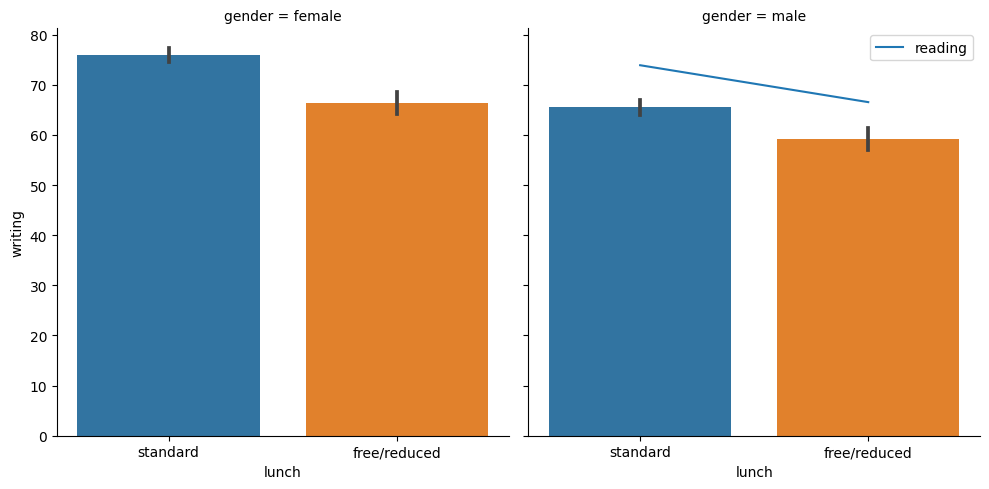

In [25]:
test_prep = sns.lineplot(x =avg_test_prep.index, y = avg_test_prep.reading, data =avg_test_prep, label = 'reading' )
test_prep
plt.show()

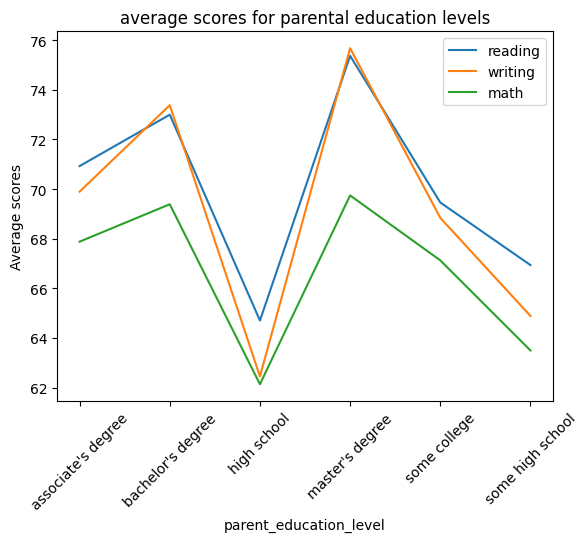

In [26]:
avg_scores_educ.plot()
plt.xticks(rotation = 45)
plt.ylabel('Average scores')
plt.title('average scores for parental education levels')
plt.show()

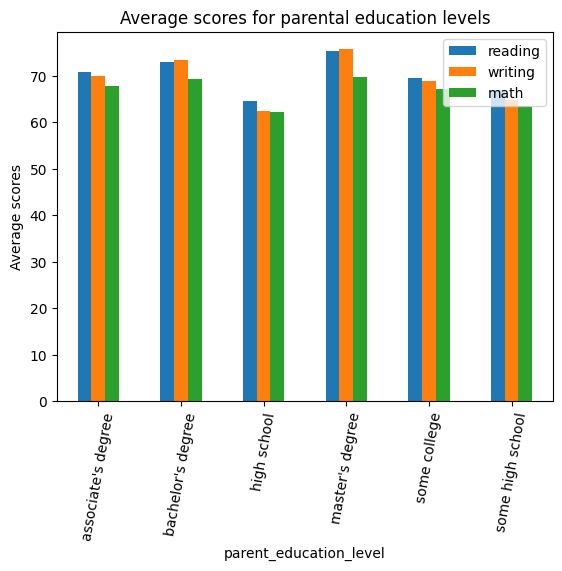

In [27]:
avg_scores_educ.plot(kind = 'bar')
plt.xticks(rotation = 80)
plt.ylabel('Average scores')
plt.title('Average scores for parental education levels')
plt.show()

Question 4

In [28]:
sub_groups= df.groupby(['parent_education_level','test_prep_course'])[['reading', 'math', 'writing']].mean()
sub_groups.sort_values('writing', ascending = False)

,,reading,math,writing
parent_education_level,test_prep_course,,,
master's degree,completed,78.250000,70.600000,80.100000
bachelor's degree,completed,76.739130,73.282609,78.695652
associate's degree,completed,76.170732,71.829268,76.817073
some college,completed,75.987013,71.454545,76.519481
master's degree,none,73.897436,69.307692,73.410256
some high school,completed,70.948052,66.701299,70.363636
bachelor's degree,none,70.611111,66.902778,69.986111
high school,completed,67.839286,65.000000,68.053571
associate's degree,none,67.857143,65.571429,65.842857


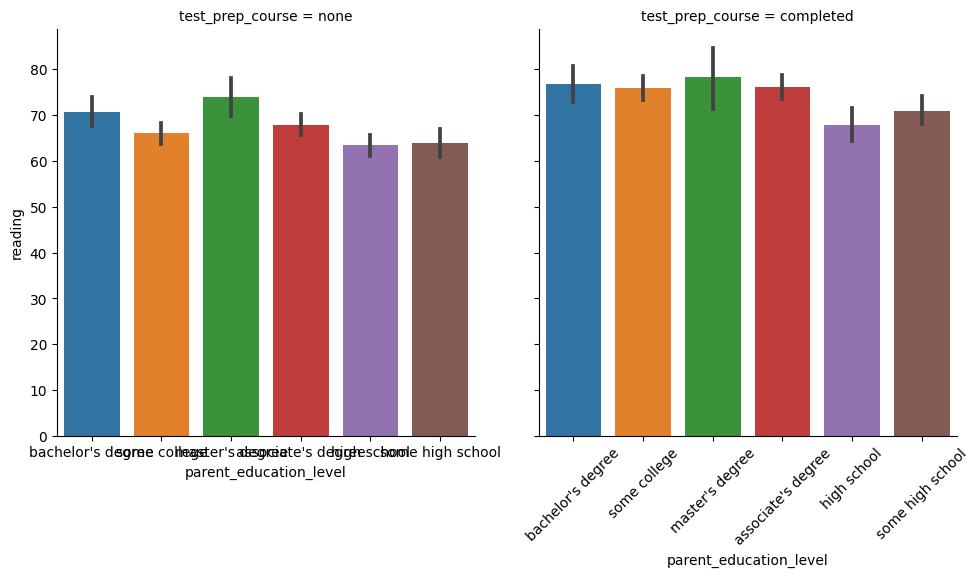

In [38]:
sns.catplot(x='parent_education_level', y='reading', col='test_prep_course', data=df, kind='bar');
plt.xticks(rotation = 45)
plt.ylabel('Reading scores')
plt.show()


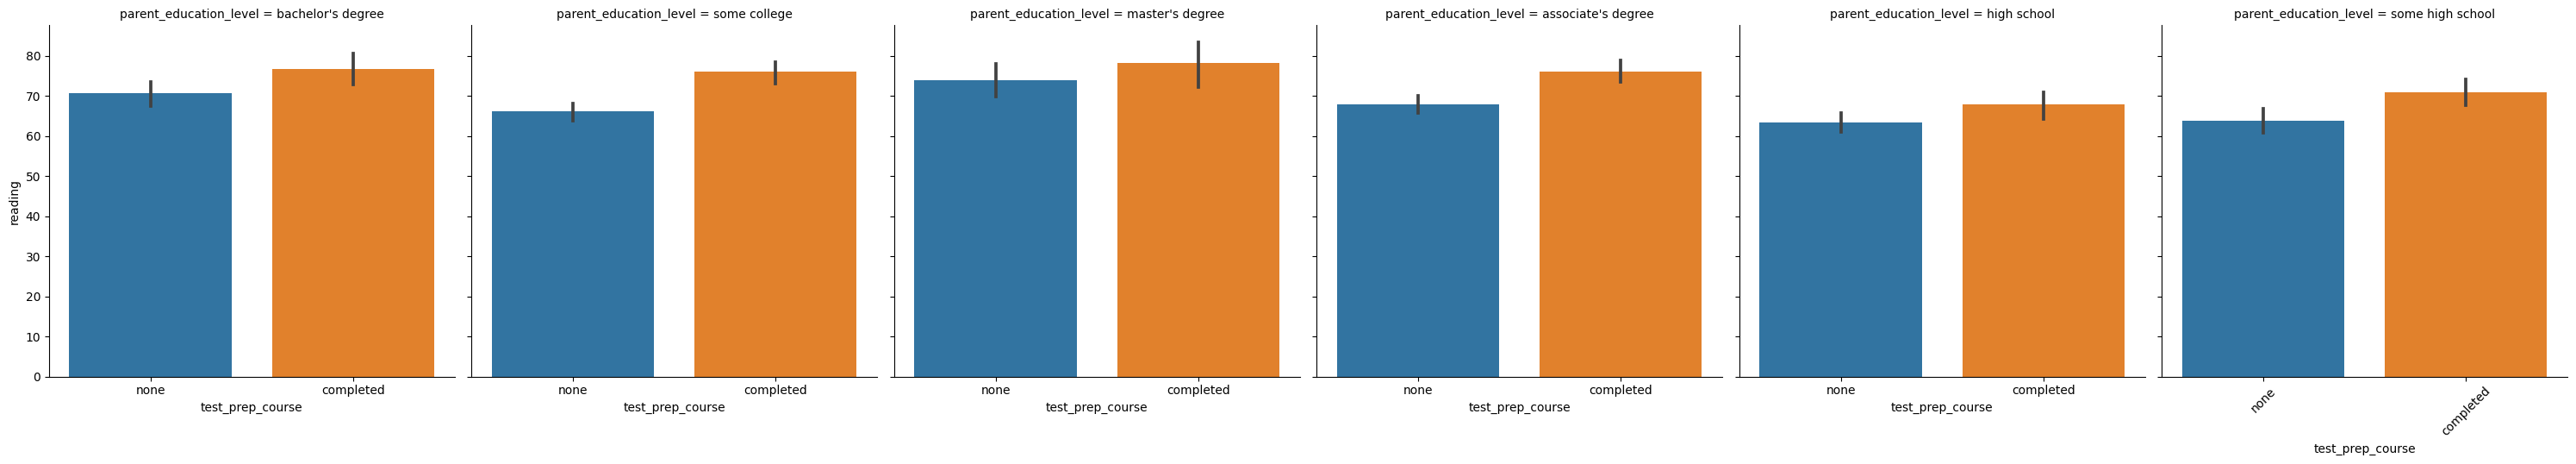

In [30]:
sns.catplot(x='test_prep_course', y='reading', col='parent_education_level', data=df, kind='bar');
plt.xticks(rotation = 45)
plt.ylabel('Reading scores')
plt.show()

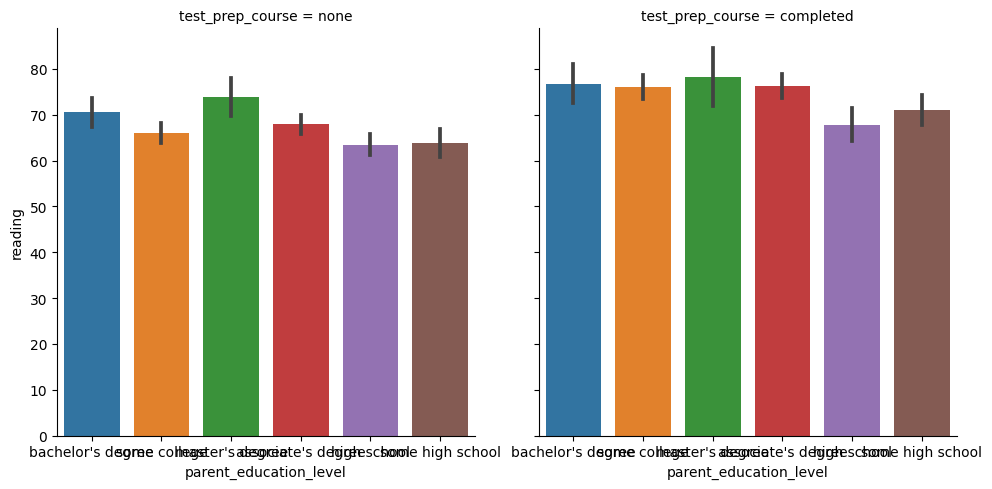

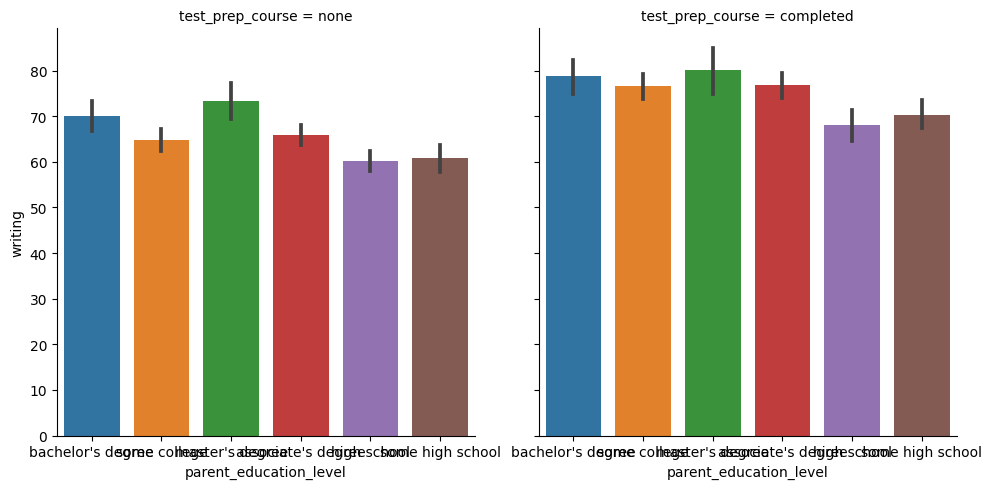

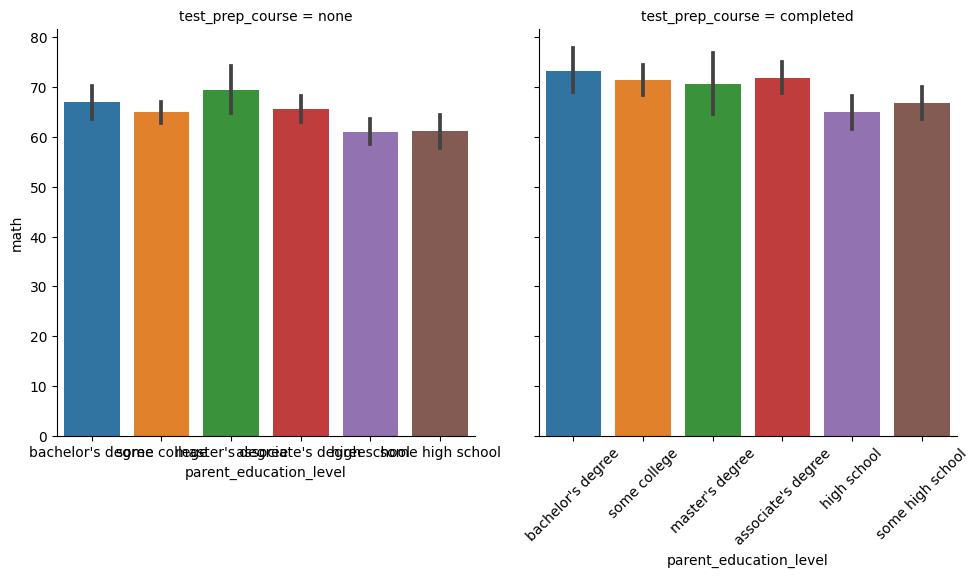

In [31]:
sns.catplot(x='parent_education_level', y='reading', col='test_prep_course', data=df, kind='bar');
plt.ylabel('Reading scores')
sns.catplot(x='parent_education_level', y='writing', col='test_prep_course', data=df, kind='bar')
plt.ylabel('Writing scores')
sns.catplot(x='parent_education_level', y='math', col='test_prep_course', data=df, kind='bar')
plt.xticks(rotation = 45)


plt.show()


Question 5

In [35]:
corr_= df.corr()
corr_

,math,reading,writing
math,1.000000,0.817580,0.802642
reading,0.817580,1.000000,0.954598
writing,0.802642,0.954598,1.000000


This table shows the correlation between each of the exams, and how a student good at one subject may have a bias to being good at another.

From this table, it can be seen that reading and writing have a very strong correlation in comparison to maths with either of the priorly specified subjects.

This makes sense as reading and writing are usually taught together and have a natural correlation.

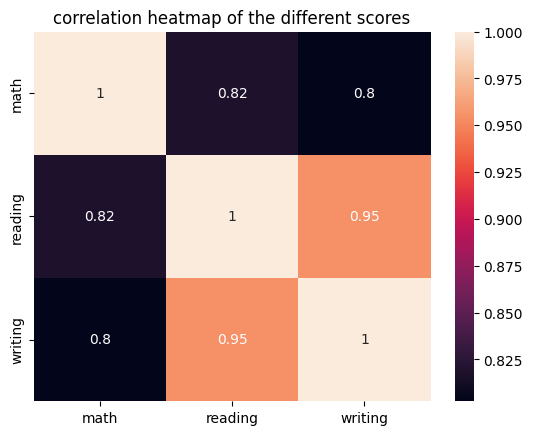

In [36]:
sns.heatmap(corr_,annot = True)
plt.title('correlation heatmap of the different scores')
plt.show()

Question 6

From the Analysis we have;

Students who completed the test preparation course have higher marks than the students who did not take the test preparation course.
Students have completed the test preparation course and have a bachelor's degree as the parental level of education have higher average math scores.
Students who completed the test preparation course and have a master's degree as the parental level of education have higher average reading scores
Students who completed the test preparation course and have a master's degree as the parental level of education have higher average writing scores.

From this, we can see that the scores of the students were more dependent on taking the test prep courses than their parent's educational level.

Students scored better in reading courses, followed by writing and then, maths.
We can infer that the maths course might prove as a challenge for students.

The correlation plot shows a high correlation amongst the different scores(reading, writing, maths) with the correlation between reading and writing showing a strong association.
Students who took reading did well in writing as well.

The parental level of education has an effect on the students' performance. From Plot 2, it shows that stdents whose parents had high school as their level of education performed lower than other students.